<a href="https://colab.research.google.com/github/javierm360/Funcionalidades-de-la-Reproducci-n-Coralina-Asistida/blob/main/Funcionalidades_Reproducci%C3%B3n_Coralina_Asistida.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Funciones del Manual de Reproducción Asistida de Corales: Experiencia República Dominicana**

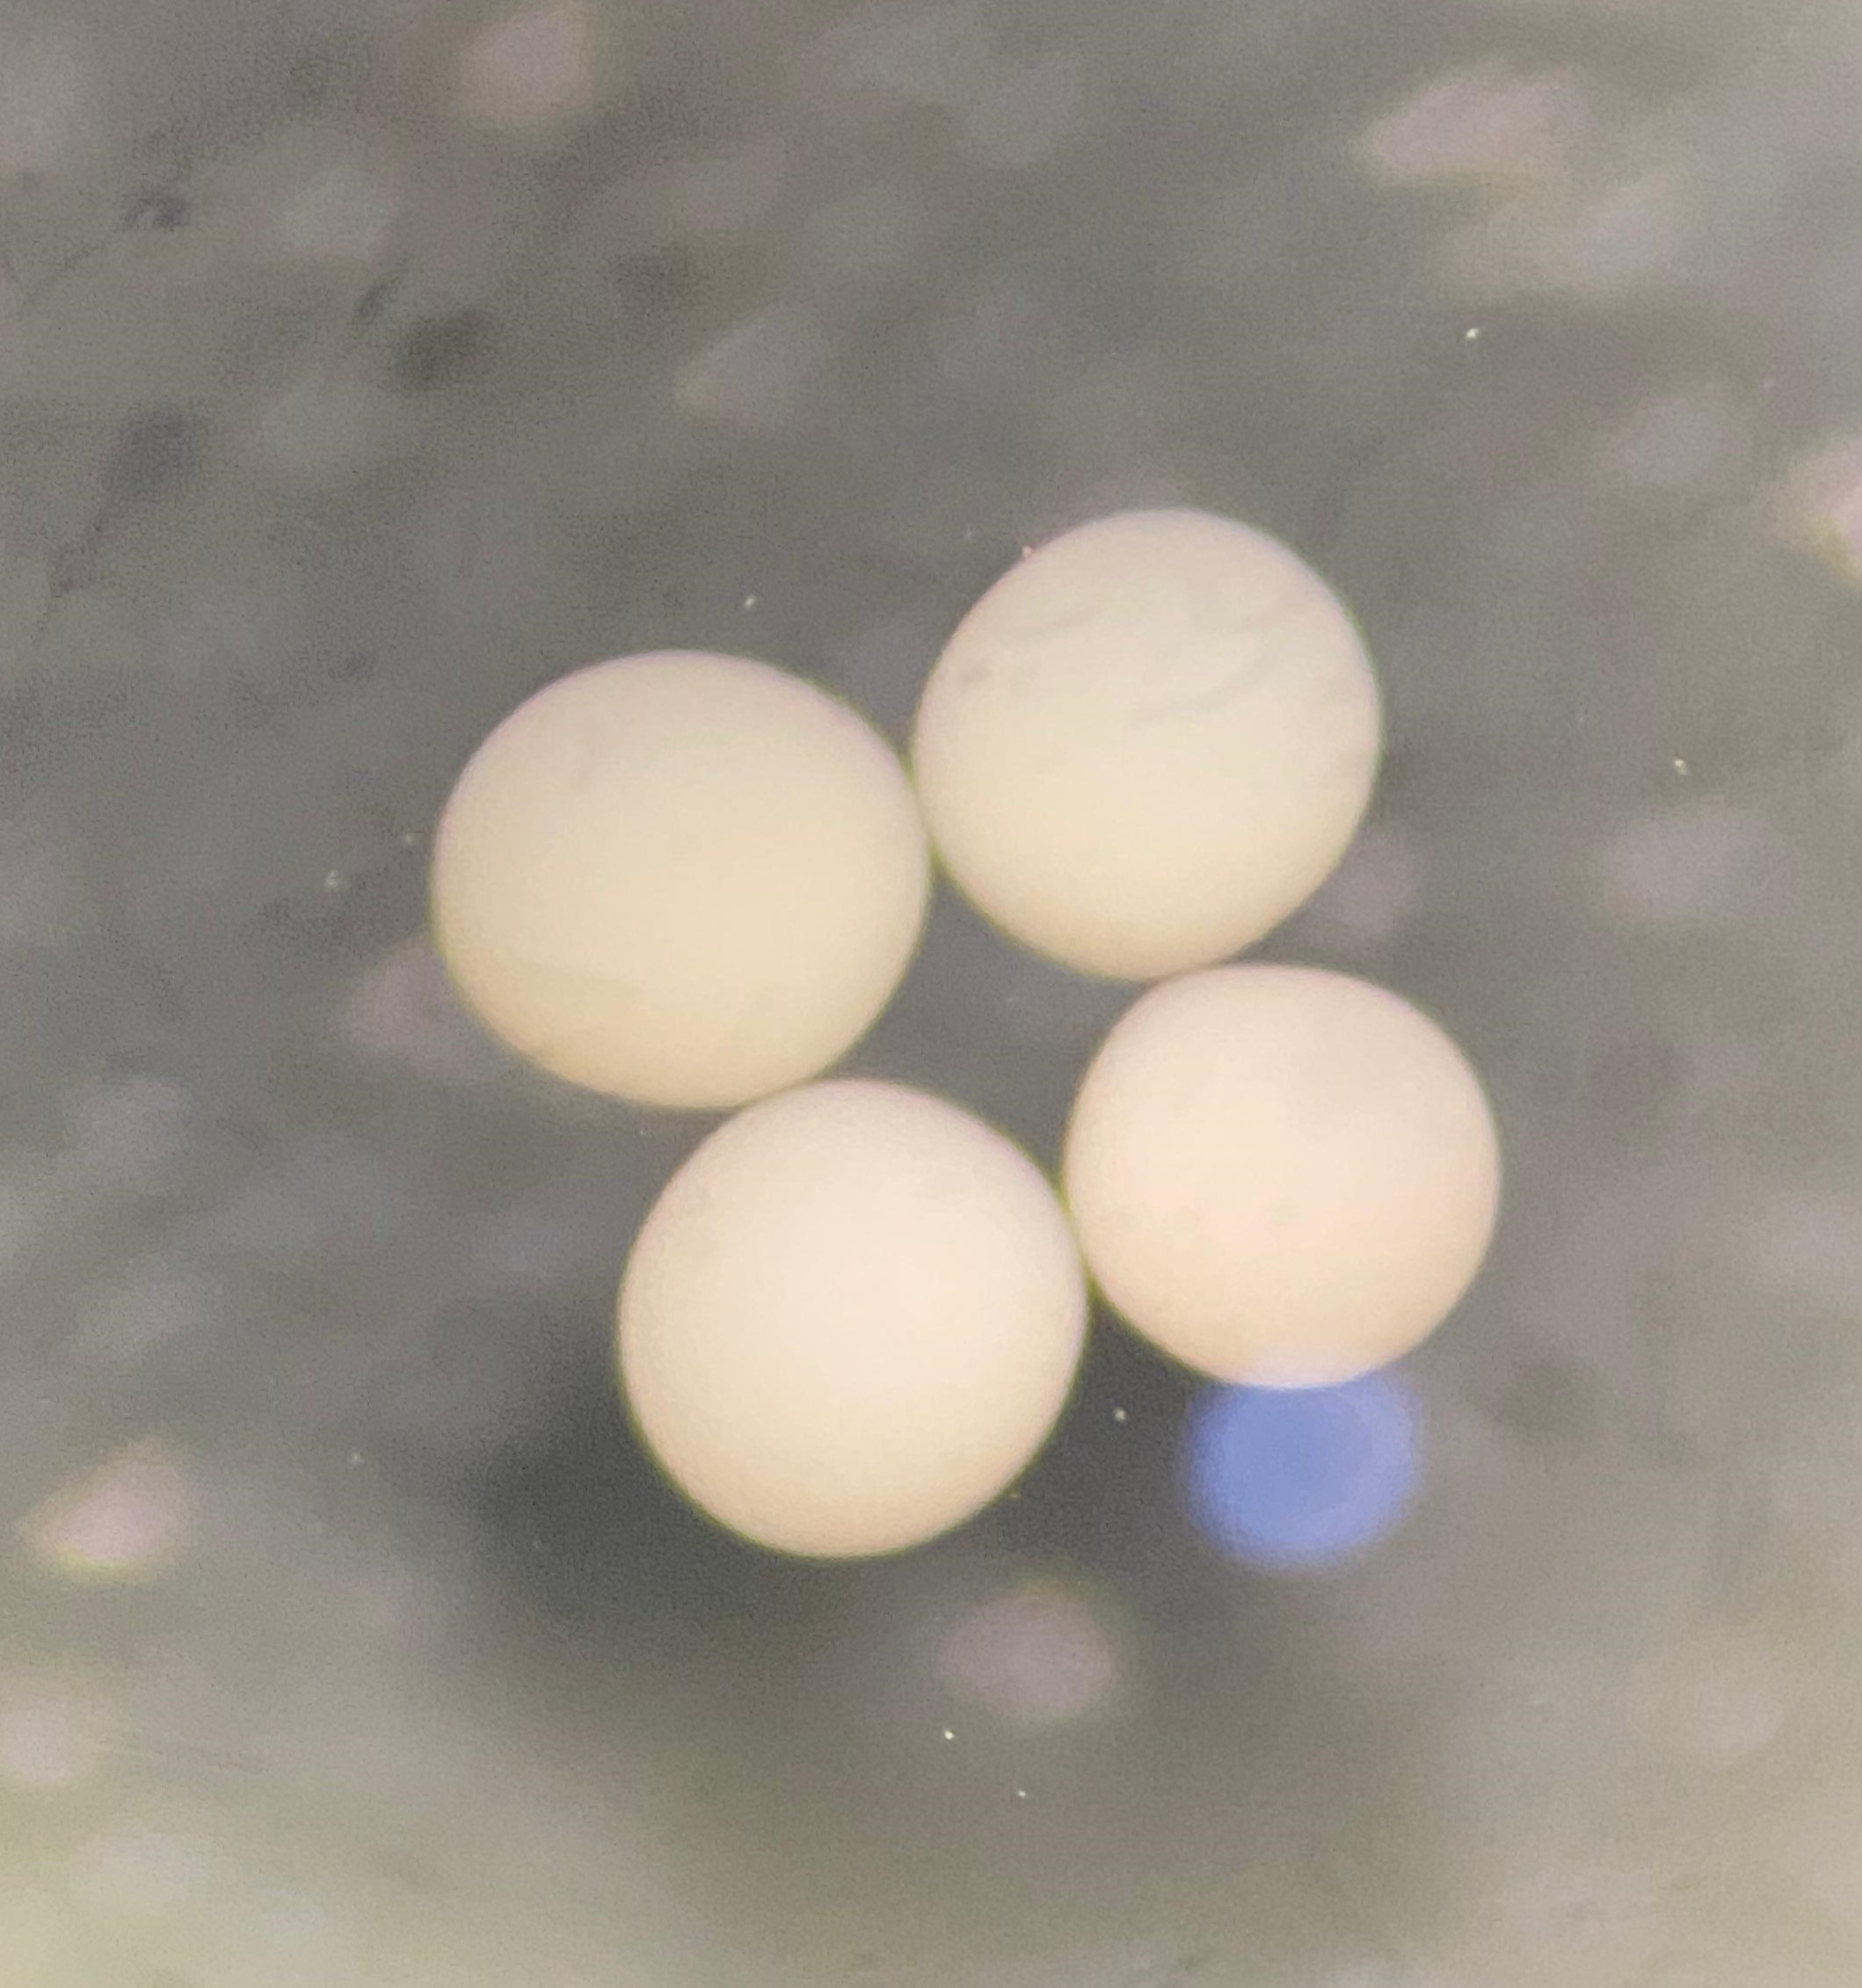

</div>


Este script ha sido ideado con la intención de dar soporte y escalabilidad a la recolección de datos realizada durante la fecundación asistida de corales en el laboratorio. Se fundamenta en las funciones establecidas en el Manual de Reproducción Asistida de Corales: Experiencia República Dominicana por Sellares-Blasco, et al. (2022).

El objetivo es conservar los scripts con la máxima facilidad de uso e interpretación posible. Por esta razón, se decidió alojarlos en Google Colab, permitiendo así que puedan ser ejecutados por cualquier persona, en cualquier lugar, solo requiriendo tener acceso a internet



**Cita del Manual:**

**SELLARES-BLASCO R., GUENDULAIN-GARCÍA S.D.,
VILLALPANDO M.F., VALDEZ-TRINIDAD A., CROQUER A. (2022).MANUAL DE REPRODUCCIÓN ASISTIDA DE CORALES:
EXPERIENCIA EN REPÚBLICA DOMINICANA
104 P. ISBN: 978-9945-9270-1-6**

**Librerias a utilizar**

In [ ]:
import math
from random import randint
import statistics
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import matplotlib.ticker as mtick
from google.colab import files
from zoneinfo import ZoneInfo

# **Calculo de Porcentaje de Fertilización**

Descripción de la Funcionalidad de la Herramienta

Esta función está diseñada para calcular y analizar el porcentaje de fecundación a partir de datos de conteo.

Específicamente, utiliza el Número de Embriones en División (NED) y el Número de gametos sin dividir (NESD) para determinar el porcentaje de fecundación de cada muestra.

La función procesa la información y genera dos resultados principales:

-DataFrame de Análisis: Se crea un DataFrame que consolida los datos de PF calculados, junto con las variables contextuales clave: sitio de colecta, especie de coral y hora de toma de cada muestra.

Reporte Gráfico y Descarga:

-Produce una gráfica (visualización) que relaciona el porcentaje de fertilización con la hora de la muestra, con diferenciación por especie y sitio.

-Realiza la descarga automática de la totalidad del DataFrame generado a un archivo con formato Excel (.xlsx).

Los pasos para lograr calcular el porcentaje de fertilización son: 

1. Una vez rotos los paquetes de gametos, seguir mezclando cada 15 minutos. 

2. Con una pipeta, tomar tres muestras pequeñas (menos de 1 ml) cada 20 minutos y revisar al estereoscopio, anotando:
   a. El número de embriones en división (NED)
   b. El número de gametos sin dividir (NESD)
Favor colocar el nombre de la especie en formato AGRAA: APAL
Favor colocar el sitio de colecta: Carenero
Favor colocar el número de embriones en división observados (solo colcoar el valor): 75
Favor colocar el número de gametos sin dividir (solo colcoar el valor): 25
Favor colocar el número de embriones en división observados (solo colcoar el valor): 120
Favor colocar el número de gametos sin dividir (solo colcoar el valor): 25
Favor colocar el número de embriones en división observados (solo colcoar el valor): 69
Favor colocar el número de gametos sin dividir (solo colcoar el valor): 20
Archivo guardado como 'datos_desove.xlsx' corre

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

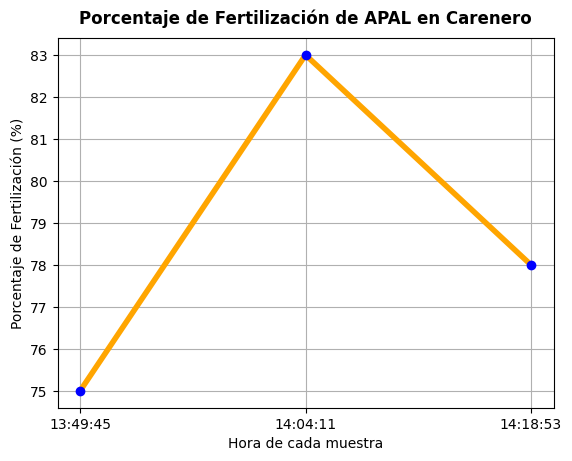

In [ ]:
def descargar(df):
    try:
        df.to_excel('Porcentaje de Fertilización (%).xlsx', index=False)
        print(f"Archivo guardado como 'Porcentaje de Fertilización (%).xlsx' correctamente.")
        files.download('Porcentaje de Fertilización (%).xlsx')
    except Exception as e:
        print(f"Error al guardar o descargar el archivo: {e}")
print("Los pasos para lograr calcular el porcentaje de fertilización son: \n")
print("1. Una vez rotos los paquetes de gametos, seguir mezclando cada 15 minutos. \n")
print("2. Con una pipeta, tomar tres muestras pequeñas (menos de 1 ml) "
    "cada 20 minutos y revisar al estereoscopio, anotando:\n"
    "   a. El número de embriones en división (NED)\n"
    "   b. El número de gametos sin dividir (NESD)")
while True:
    especie= input('Favor colocar el nombre de la especie en formato AGRAA: ').upper()
    sitio= input('Favor colocar el sitio de colecta: ')
    if especie.isalpha():
        break
    else:
        print('Favor colocar la especie (no letras o caracteres especiales) ')
muestras= []
for i in range(3):
    while True:
        try:
            ned= int(input('Favor colocar el número de embriones en división observados (solo colocar el valor): '))
            break
        except ValueError:
            print('Favor introduce un número válido')
    while True:
        try:
            nesd= int(input("Favor colocar el número de gametos sin dividir (solo colcoar el valor): "))
            break
        except ValueError:
            print('Favor introduce un número válido')

    fertilizacion= (ned * 100)/ (ned + nesd)
    hora_rd = datetime.now(ZoneInfo("America/Santo_Domingo")).strftime("%H:%M:%S")
    muestras.append({'Especie': especie,
                     'Sitio': sitio,
                     'Número de embriones en división (NED)': ned,
                     'Número de gametos sin dividir (NESD)': nesd,
                     'Porcentaje de fertilizacion': round(fertilizacion, 0),
                     'Hora': hora_rd})
df= pd.DataFrame(muestras)
sns.lineplot(df, x= 'Hora', y= 'Porcentaje de fertilizacion',
             color= 'orange', linewidth= 4)
plt.scatter(df['Hora'], df['Porcentaje de fertilizacion'],
                c= 'blue', marker= 'o', zorder=5)
plt.title(f'Porcentaje de Fertilización de {especie} en {sitio}',
          fontweight= 'bold',
          pad= 10)
plt.ylabel('Porcentaje de Fertilización (%)')
plt.xlabel('Hora de cada muestra')
plt.grid(True)
descargar(df)

# **Calcular el la cantidad de embriones**

Función de Estimación de Embriones en muestras

Esta herramienta está diseñada para la estimación del número total de embriones a partir de la altura de la columna de gametos en los frascos de colecta, incorporando información específica de la especie.

Entrada de Datos: La función requiere la introducción de las  especies de coral colectadas. Permite dos métodos de entrada para el conteo de embriones:

1-Entrada Directa: Si se dispone del número de embriones por unidad de volumen, el usuario puede ingresar directamente esta información.

2-Referencia Externa: En caso de desconocer el conteo directo, la función puede recurrir a una tabla de referencia preestablecida (proporcionada por SEACORE International) para obtener un valor estimado basado en la especie.

Estimación Volumétrica: La función solicita diez mediciones de la altura (H) que presenta la columna de gametos en el frasco y el radio (R) interno del frasco de colecta.

Utilizando estos parámetros, la función procede a calcular el número total de embriones presentes en la muestra mediante la integración de los datos biológicos y la geometría del contenedor.

Salidas Generadas:

1-La ejecución de la función resulta en dos productos principales:

2-Visualización Gráfica: Se genera una gráfica que muestra el número estimado de embriones obtenidos por muestra, facilitando la comparación visual entre especies o sitios.

Reporte de Datos: Se crea un archivo Excel (.xlsx) que contiene la data completa de la estimación (incluyendo las medidas de H y R, la especie, y el número final de embriones calculado), el cual se descarga automáticamente.

Esta funcion utiliza los datos de las especies colectadas y en caso de conocer el numero de embriones permite ingresar la informacion, mientras que en caso de no conocerse ese dato permite utilizar la tabla generada previamente por SEACORE International.

Adicionalmente pide 10 medidas de la altura que presentan los gametos en el frasco y el radio del mismo. Calculando el numero de embriones presentes.


Esto genera adicionalmente una grafica con el numero de embriones obtenidos y genera un excel que se descarga de manera automatica con la data.

Favor colocar el Sitio de ColectaCayo Jackson
Favor colocar la cantidad de especies que desovaron: 3
Favor colocar la especie colectada, esta debe de estar en formato AGRRA: ACER
Favor colocar SI en caso de contar con muestras y NO en caso de desear usar las medidas de embriones por ml preestablecidas por SEACORE: NO
Favor colocar la medida # 1 de la altura: 2.2
Favor colocar la medida # 2 de la altura: 2.1
Favor colocar la medida # 3 de la altura: 2.2
Favor colocar la medida # 4 de la altura: 2.1
Favor colocar la medida # 5 de la altura: 2.1
Favor colocar la medida # 6 de la altura: 2.1
Favor colocar la medida # 7 de la altura: 2.1
Favor colocar la medida # 8 de la altura: 2.1
Favor colocar la medida # 9 de la altura: 2.3
Favor colocar la medida # 10 de la altura: 2.4
Favor colocar el radio del frasco: 5

Datos recopilados:
        Fecha Especie         Sitio  Altura  Radio  Embriones por ml  \
0  2025-10-15    ACER  Cayo Jackson    2.17    5.0              5240   

   Número embrione

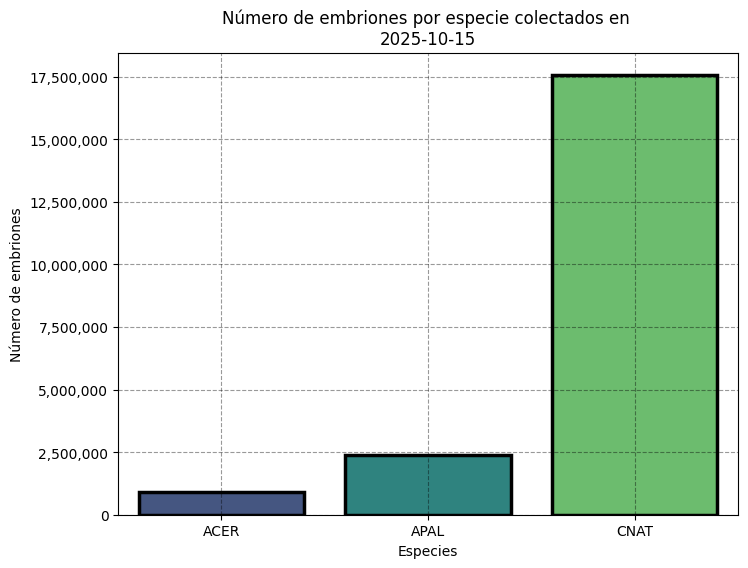

Archivo guardado como 'Porcentaje de Número embriones.xlsx' correctamente.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
def descargar_embriones(df):
    try:
        df.to_excel('Número embriones.xlsx', index=False)
        print(f"Archivo guardado como 'Porcentaje de Número embriones.xlsx' correctamente.")
        files.download('Número embriones.xlsx')
    except Exception as e:
        print(f"Error al guardar o descargar el archivo: {e}")
sitio = input('Favor colocar el Sitio de Colecta')
numero_embriones_1mL = {
    'ACER': 5240,
    'APAL': randint(5000, 10000),
    'CNAT': randint(19000, 25000),
    'DLAB': randint(15000, 20000),
    'OFAV': 27000}
def h():
    lista_medidas = []
    for i in range(10):
        medidas = input(f'Favor colocar la medida # {i + 1} de la altura: ')
        try:
            numero = float(medidas)
        except ValueError:
            print('El valor colocado no es un número válido. Por favor ingrese un valor numérico.')
            continue
        lista_medidas.append(numero)
    altura = statistics.mean(lista_medidas)
    return altura
def embriones_ml(cantidad_desoves, lista_validas):
    while True:
        especie = str(input('Favor colocar la especie colectada, esta debe de estar en formato AGRRA: ').strip().upper())
        medida = str(input('Favor colocar SI en caso de contar con muestras y NO en caso de desear usar las medidas de embriones por ml preestablecidas por SEACORE: ').strip().upper())
        if medida == 'SI':
            muestras = int(input('Favor colocar la cantidad de muestras a ser realizadas: '))
            lista_muestras = []
            for i in range(muestras):
                muestra = int(input(f'Favor colocar los embriones promedio por ml para la muestra #{i + 1}: '))
                lista_muestras.append(muestra)
            muestra_promedio = statistics.mean(lista_muestras)
            return especie, muestra_promedio
        elif medida == 'NO':
            if especie.isalpha() and especie in lista_validas:
                return especie, lista_validas[especie]
            else:
                print(f'La especie {especie} no está escrita correctamente o no está contemplada dentro del protocolo.')
        else:
            print("Por favor ingrese 'SI' o 'NO'.")
def graficar_embriones(df):
    fig, ax = plt.subplots(figsize=(8,6))
    sns.barplot(data=df, x='Especie', y='Número embriones', palette='viridis',
                hue='Especie', edgecolor='k', linewidth=2.5, ax=ax)
    ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
    ax.yaxis.get_major_locator().set_params(integer=True)
    plt.ylabel('Número de embriones')
    plt.xlabel('Especies')
    plt.grid(linestyle='--', alpha=0.4, color='k')
    if 'Fecha' in df.columns:
        fecha = df['Fecha'].iloc[0]
    else:
        fecha = ''
    plt.title(f"Número de embriones por especie colectados en \n{fecha}")
    plt.show()
cantidad_desoves = int(input('Favor colocar la cantidad de especies que desovaron: '))
datos = []

for _ in range(cantidad_desoves):
    especie, embriones_especie = embriones_ml(cantidad_desoves, numero_embriones_1mL)
    altura = h()
    radio = input('Favor colocar el radio del frasco: ')
    radio = float(radio)
    numero_embriones = embriones_especie * (math.pi * radio ** 2 * altura)
    datos.append({
        'Fecha': datetime.now().strftime('%Y-%m-%d'),
        'Especie': especie,
        'Sitio' : sitio,
        'Altura': altura,
        'Radio': radio,
        'Embriones por ml': embriones_especie,
        'Número embriones': numero_embriones})
    df = pd.DataFrame(datos)
    print("\nDatos recopilados:")
    print(df)
graficar_embriones(df)
descargar_embriones(df)

# **Calculo del volumen de embriones**

**Aún se encuentra en desarrollo...**